# Terraform + Ansible for GCP


## Prerequisites

In [ ]:
!wget -O- https://apt.releases.hashicorp.com/gpg | gpg --dearmor | sudo tee /usr/share/keyrings/hashicorp-archive-keyring.gpg
!gpg --no-default-keyring --keyring /usr/share/keyrings/hashicorp-archive-keyring.gpg --fingerprint
!echo "deb [signed-by=/usr/share/keyrings/hashicorp-archive-keyring.gpg] https://apt.releases.hashicorp.com $(lsb_release -cs) main" | sudo tee /etc/apt/sources.list.d/hashicorp.list
!sudo apt update && sudo apt install terraform

--2025-06-12 12:15:23--  https://apt.releases.hashicorp.com/gpg
Resolving apt.releases.hashicorp.com (apt.releases.hashicorp.com)... 108.138.128.70, 108.138.128.126, 108.138.128.129, ...
Connecting to apt.releases.hashicorp.com (apt.releases.hashicorp.com)|108.138.128.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3980 (3.9K) [binary/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-06-12 12:15:23 (1.04 GB/s) - written to stdout [3980/3980]

�Tj:/ȳh�h���Nf�����c��c����W{5!�Q����6&�Y�b[��Ұ�����Rώ��ԧ����a�}k57���R]�� �����#�z͸�=�~׳dL�у�E�v�����m�07�m�HuC�8'p$g>ҏ��D�XL�w�
c�4�A��k�f�ѨAXH�;��~�  �QHashiCorp Security (HashiCorp Package Signing) <security+packaging@hashicorp.com>�T >	
	�!y��eN\B��B����!�c��=		f� 
�D�9fS�u�!d�
c�� ��{����Ü���U�= �i6+���Xx�ĕ� ,�K��a%�	�<I�Z���A|�t�f�[�
�|{P��x ��tGS���u
-�j

In [ ]:
!pip install ansible
!apt-get install -y jq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 357 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libonig5 amd64 6.9.7.1-2build1 [172 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libjq1 amd64 1.6-2.1ubuntu3 [133 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 jq amd64 1.6-2.1ubuntu3 [52.5 kB]
Fetched 357 kB in 1s (583 kB/s)
Selecting previously unselected package libonig5:amd64.
(Reading database ... 126114 files and directories currently installed.)
Pre

In [ ]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo gpg --dearmor -o /usr/share/keyrings/cloud.google.gpg
!echo "deb [signed-by=/usr/share/keyrings/cloud.google.gpg] https://packages.cloud.google.com/apt cloud-sdk main" | sudo tee -a /etc/apt/sources.list.d/google-cloud-sdk.list
!sudo apt update && sudo apt install google-cloud-cli

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1022  100  1022    0     0  11700      0 --:--:-- --:--:-- --:--:-- 11747
deb [signed-by=/usr/share/keyrings/cloud.google.gpg] https://packages.cloud.google.com/apt cloud-sdk main
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://apt.releases.hashicorp.com jammy InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://packages.cloud.google.com/apt cloud-sdk InRelease [1,618 B]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/p

In [ ]:
!terraform version
!gcloud version
!ansible --version

Terraform v1.12.1
on linux_amd64
Google Cloud SDK 525.0.0
alpha 2025.05.30
beta 2025.05.30
bq 2.1.17
bundled-python3-unix 3.12.9
core 2025.05.30
gcloud-crc32c 1.0.0
gsutil 5.34
ansible [core 2.18.6]
  config file = None
  configured module search path = ['/root/.ansible/plugins/modules', '/usr/share/ansible/plugins/modules']
  ansible python module location = /usr/local/lib/python3.11/dist-packages/ansible
  ansible collection location = /root/.ansible/collections:/usr/share/ansible/collections
  executable location = /usr/local/bin/ansible
  python version = 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] (/usr/bin/python3)
  jinja version = 3.1.6
  libyaml = True


In [ ]:
#Generate ssh key pair
GCP_userID="da_gawel"  # your GCP_userID is your google login where . and @ are replaced with _

!mkdir .ssh
!ssh-keygen -t ed25519 -f .ssh/id_ed25519 -N '' -C $GCP_userID

#Download configuration files
!wget -O cloud_mpi.zip https://drive.google.com/uc?id=1R0UbmwS_HKYer7LSsuL7Zw_aVhKq-0dI&export=download
!unzip cloud_mpi.zip

Generating public/private ed25519 key pair.
Your identification has been saved in .ssh/id_ed25519
Your public key has been saved in .ssh/id_ed25519.pub
The key fingerprint is:
SHA256:vM+g7fRTXDECiZFedePOcTpEZgb/sn5sfSpdhRx+Lwc da_gawel
The key's randomart image is:
+--[ED25519 256]--+
|        .+.+o.B  |
|        o o .O+. |
|       . .   +==.|
|       ..    +E=o|
|        S  . .*o+|
|         .  o .++|
|        +  . ..=.|
|       + =. ... *|
|      ..o +. .o+.|
+----[SHA256]-----+
--2025-06-10 21:48:17--  https://drive.google.com/uc?id=1R0UbmwS_HKYer7LSsuL7Zw_aVhKq-0dI
Resolving drive.google.com (drive.google.com)... 74.125.132.102, 74.125.132.139, 74.125.132.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1R0UbmwS_HKYer7LSsuL7Zw_aVhKq-0dI [following]
--2025-06-10 21:48:17--  https://drive.usercontent.google.com/download?id=1R0Ubm

## Environment Setup

In [ ]:
PROJECT_ID="my-first-project-453118"
SERVICE_NAME="taxi-stream-sa"
%env PROJECT_ID=$PROJECT_ID
%env SERVICE_NAME=$SERVICE_NAME
%env GCP_userID=$GCP_userID
%env GCP_privateKeyFile=/content/.ssh/id_ed25519

### Terrform setup variables
# Name of your GCP project
%env TF_VAR_project=$PROJECT_ID
# Name of your selected GCP region
%env TF_VAR_region=europe-central2
# Name of your selected GCP zone
%env TF_VAR_zone=europe-central2-a

### Other variables used by Terrform
# Number of VMs created
%env TF_VAR_machineCount=4
# VM type
%env TF_VAR_machineType=e2-medium
# Prefix for you VM instances
%env TF_VAR_instanceName=tf-instance
# Prefix of your GCP deployment key
TF_VAR_deployKeyName = "../" + SERVICE_NAME + ".json"
%env TF_VAR_deployKeyName=$TF_VAR_deployKeyName

env: PROJECT_ID=my-first-project-453118
env: SERVICE_NAME=taxi-stream-sa
env: GCP_userID=da_gawel
env: GCP_privateKeyFile=/content/.ssh/id_ed25519
env: TF_VAR_project=my-first-project-453118
env: TF_VAR_region=europe-central2
env: TF_VAR_zone=europe-central2-a
env: TF_VAR_machineCount=4
env: TF_VAR_machineType=e2-medium
env: TF_VAR_instanceName=tf-instance
env: TF_VAR_deployKeyName=../taxi-stream-sa.json


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Google Cloud Setup
!gcloud config set project $PROJECT_ID
!gcloud services enable iam.googleapis.com
!gcloud services enable compute.googleapis.com

Updated property [core/project].


In [ ]:
!gcloud iam service-accounts create $SERVICE_NAME
!gcloud projects add-iam-policy-binding $PROJECT_ID --member serviceAccount:$SERVICE_NAME@$PROJECT_ID.iam.gserviceaccount.com --role roles/editor
!gcloud iam service-accounts keys create ./$SERVICE_NAME.json --iam-account $SERVICE_NAME@$PROJECT_ID.iam.gserviceaccount.com

Created service account [taxi-stream-sa].
Updated IAM policy for project [my-first-project-453118].
bindings:
- members:
  - serviceAccount:service-236337580274@compute-system.iam.gserviceaccount.com
  role: roles/compute.serviceAgent
- members:
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=102022121960409109979
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=102740095024774724105
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=103772935150528755787
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=105736832158270056395
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=107793606986501322790
  - deleted:serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com?uid=113644095441074332665
  - deleted:serviceAccount:taxi-stream-sa@my-first-project

In [ ]:
# run output of this cell in Cloud Shell in case the above doesn't work in Colab
!echo gcloud iam service-accounts create $SERVICE_NAME
!echo gcloud projects add-iam-policy-binding $PROJECT_ID --member serviceAccount:$SERVICE_NAME@$PROJECT_ID.iam.gserviceaccount.com --role roles/editor
!echo gcloud iam service-accounts keys create ./$SERVICE_NAME.json --iam-account $SERVICE_NAME@$PROJECT_ID.iam.gserviceaccount.com

gcloud iam service-accounts create taxi-stream-sa
gcloud projects add-iam-policy-binding my-first-project-453118 --member serviceAccount:taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com --role roles/editor
gcloud iam service-accounts keys create ./taxi-stream-sa.json --iam-account taxi-stream-sa@my-first-project-453118.iam.gserviceaccount.com


## Terraform Provisioning

In [ ]:
%%writefile cloud_mpi/main.tf
provider "google" {
  credentials = file(var.deployKeyName)
  project     = var.project
  region      = var.region
  zone        = var.zone
}

resource "google_compute_instance" "kafka" {
  name         = "kafka-broker"
  machine_type = "e2-medium"
  boot_disk {
    initialize_params { image = "debian-cloud/debian-11" }
  }
  network_interface {
    network = "default"
    access_config {}
  }
}

resource "google_compute_instance" "master" {
  name         = "spark-master"
  machine_type = "e2-medium"
  boot_disk {
    initialize_params { image = "debian-cloud/debian-11" }
  }
  tags         = ["spark", "master"]
  network_interface {
    network = "default"
    access_config {}
  }
}

resource "google_compute_instance" "worker" {
  count        = 4
  name         = "spark-worker-${count.index}"
  machine_type = "e2-medium"
  boot_disk {
    initialize_params { image = "debian-cloud/debian-11" }
  }
  tags         = ["spark", "worker"]
  network_interface {
    network = "default"
    access_config {}
  }
}

output "kafka_ip" {
  value = "${google_compute_instance.kafka.network_interface[0].access_config[0].nat_ip}"
}

output "master_ip" {
  value = "${google_compute_instance.master.network_interface[0].access_config[0].nat_ip}"
}

output "worker_ips" {
  value = [for instance in google_compute_instance.worker : instance.network_interface[0].access_config[0].nat_ip]
}

output "kafka_internal_ip" {
  value = google_compute_instance.kafka.network_interface[0].network_ip
}

output "master_internal_ip" {
  value = google_compute_instance.master.network_interface[0].network_ip
}

output "worker_internal_ips" {
  value = [for instance in google_compute_instance.worker : instance.network_interface[0].network_ip]
}

Writing cloud_mpi/main.tf


In [ ]:
!rm cloud_mpi/simple_deployment.tf

In [ ]:
!cd cloud_mpi && ./gen_transform_key.sh

### Run Terraform

In [ ]:
#Initialize terraform
!cd cloud_mpi && terraform init

Initializing the backend...
Initializing provider plugins...
- Reusing previous version of hashicorp/google from the dependency lock file
- Using previously-installed hashicorp/google v5.10.0

Terraform has been successfully initialized!

You may now begin working with Terraform. Try running "terraform plan" to see
any changes that are required for your infrastructure. All Terraform commands
should now work.

If you ever set or change modules or backend configuration for Terraform,
rerun this command to reinitialize your working directory. If you forget, other
commands will detect it and remind you to do so if necessary.


In [ ]:
#Verify Configuration (IMPORTANT: look at the output if everything is correct: 3 VMs, and metadata)
!cd cloud_mpi && terraform plan

google_compute_instance.worker[0]: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/spark-worker-0]
google_compute_instance.master: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/spark-master]
google_compute_instance.worker[2]: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/spark-worker-2]
google_compute_instance.kafka: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/kafka-broker]
google_compute_instance.worker[3]: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/spark-worker-3]
google_compute_instance.worker[1]: Refreshing state... [id=projects/my-first-project-453118/zones/europe-central2-a/instances/spark-worker-1]
google_compute_project_metadata.default: Refreshing state... [id=my-first-project-453118]

Note: Objects have changed outside of Terraform

Terraform detected 

In [ ]:
#Launch the deployment
!cd cloud_mpi && echo "yes" | terraform apply


Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # google_compute_instance.kafka will be created
  + resource "google_compute_instance" "kafka" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + effective_labels     = (known after apply)
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "kafka-broker"
      + project              = "my-first-project-453118"
      + self_link      

In [ ]:
%%bash
cd cloud_mpi

KAFKA_IP=$(terraform output -raw kafka_ip)
MASTER_IP=$(terraform output -raw master_ip)
WORKER_IPS=($(terraform output -json worker_ips | jq -r '.[]'))

KAFKA_INTERNAL_IP=$(terraform output -raw kafka_internal_ip)
MASTER_INTERNAL_IP=$(terraform output -raw master_internal_ip)
WORKER_INTERNAL_IPS=($(terraform output -json worker_internal_ips | jq -r '.[]'))

cat > inventory.ini <<EOF
[kafka]
kafka-broker ansible_host=${KAFKA_IP} kafka_internal_ip=${KAFKA_INTERNAL_IP}

[spark_master]
spark-master ansible_host=${MASTER_IP} master_internal_ip=${MASTER_INTERNAL_IP}

[spark_workers]
spark-worker-0 ansible_host=${WORKER_IPS[0]} worker_internal_ip=${WORKER_INTERNAL_IPS[0]}
spark-worker-1 ansible_host=${WORKER_IPS[1]} worker_internal_ip=${WORKER_INTERNAL_IPS[1]}
spark-worker-2 ansible_host=${WORKER_IPS[2]} worker_internal_ip=${WORKER_INTERNAL_IPS[2]}
spark-worker-3 ansible_host=${WORKER_IPS[3]} worker_internal_ip=${WORKER_INTERNAL_IPS[3]}


[all:vars]
ansible_user=${GCP_userID}
ansible_ssh_private_key_file=/content/.ssh/id_ed25519
EOF

echo "===== inventory.ini ====="
cat inventory.ini

===== inventory.ini =====
[kafka]
kafka-broker ansible_host=34.116.128.116 kafka_internal_ip=10.186.15.230

[spark_master]
spark-master ansible_host=34.118.115.4 master_internal_ip=10.186.15.229

[spark_workers]
spark-worker-0 ansible_host=34.118.73.118 worker_internal_ip=10.186.15.226
spark-worker-1 ansible_host=34.116.157.183 worker_internal_ip=10.186.15.228
spark-worker-2 ansible_host=34.118.86.149 worker_internal_ip=10.186.15.227
spark-worker-3 ansible_host=34.118.109.31 worker_internal_ip=10.186.15.225


[all:vars]
ansible_user=da_gawel
ansible_ssh_private_key_file=/content/.ssh/id_ed25519


In [ ]:
%%bash
cd cloud_mpi
mkdir -p ansible/roles/{common,kafka,spark}/tasks ansible/roles/kafka/{files,templates}
mkdir ansible/roles/spark/files

## Python scripts

### Spark job

In [ ]:
%%bash
cd cloud_mpi/
cat > ansible/roles/spark/files/spark_job.py <<'EOF'

import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col, window, date_format
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType

KAFKA_BOOTSTRAP_SERVERS = "10.186.15.230:9092"
TOPIC_TRIP_STARTS = "trips_start"
TOPIC_TRIP_ENDS = "trips_end"
CHECKPOINT_LOCATION = "hdfs://spark-master:9000/spark/chk"
OUTPUT_DAILY_DIR = "/home/output_csv"

schema = StructType([
    StructField("ride_id", StringType()),
    StructField("timestamp", TimestampType()),
    StructField("zone", IntegerType()),
    StructField("type", StringType())
])

spark = SparkSession.builder \
    .appName("TripsPerHourStreaming") \
    .getOrCreate()
spark.conf.set("spark.sql.shuffle.partitions", "8")

def read_stream(topic, timestamp_alias, zone_alias):
    return (
        spark.readStream.format("kafka")
        .option("subscribe", topic)
        .option("kafka.bootstrap.servers", KAFKA_BOOTSTRAP_SERVERS)
        .load()
        .selectExpr("CAST(value AS STRING)")
        .select(from_json(col("value"), schema).alias("data"))
        .select("data.*")
        .withWatermark("timestamp", "1 hour")
        .selectExpr(f"ride_id", f"timestamp as {timestamp_alias}", f"zone as {zone_alias}")
    )

start_df = read_stream(TOPIC_TRIP_STARTS, "pickup_time", "pickup_zone")
end_df = read_stream(TOPIC_TRIP_ENDS, "dropoff_time", "dropoff_zone")

joined = start_df.join(end_df, "ride_id")

agg = joined.groupBy(
    window(col("pickup_time"), "1 hour"),
    col("pickup_zone"),
    col("dropoff_zone")
).count().selectExpr(
    "window.start as hour_start",
    "pickup_zone",
    "dropoff_zone",
    "count as num_trips"
)

def foreach_batch(batch_df, batch_id):
    filtered = batch_df.filter(col("num_trips") > 0)
    if filtered.rdd.isEmpty():
        return

    enriched = filtered \
        .withColumn("hour_start_date", date_format(col("hour_start"), "yyyy-MM-dd")) \
        .withColumn("hour_start_full", date_format(col("hour_start"), "yyyy-MM-dd HH:mm:ss"))

    enriched.select("hour_start_full", "pickup_zone", "dropoff_zone", "num_trips", "hour_start_date") \
        .write \
        .mode("append") \
        .option("header", True) \
        .partitionBy("hour_start_date") \
        .csv(OUTPUT_DAILY_DIR)

query = agg.writeStream \
    .outputMode("append") \
    .foreachBatch(foreach_batch) \
    .option("checkpointLocation", CHECKPOINT_LOCATION) \
    .trigger(processingTime="10 seconds") \
    .start()

query.awaitTermination()

EOF

### Data producer

In [ ]:
%%bash
cd cloud_mpi/

cat > ansible/roles/spark/files/data_producer.py <<'EOF'
#!/usr/bin/env python3
import sys
import os
import argparse
import datetime
import logging
import json
import uuid
import time

from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import col, row_number, max as spark_max
from pyspark.sql.types import TimestampType, IntegerType
from kafka import KafkaProducer

logging.basicConfig(
    filename='/tmp/producer.log',
    level=logging.INFO,
    format='%(asctime)s %(levelname)s %(message)s'
)

parser = argparse.ArgumentParser(description='Kafka batch data producer')
parser.add_argument('--brokers', default='localhost:9092')
parser.add_argument('--parquet', required=True,
                    help='Path to input parquet file')
parser.add_argument('--topic_start', default='trips_start')
parser.add_argument('--topic_end', default='trips_end')
parser.add_argument('--batch_size', type=int, default=60000,
                    help='Number of records per batch')
parser.add_argument('--speedup', type=float, default=1.0,
                    help='Speed-up factor for inter-message delay')
args = parser.parse_args()

def create_producer():
    return KafkaProducer(
        bootstrap_servers=[args.brokers],
        value_serializer=lambda v: json.dumps(v).encode('utf-8')
    )

def send_batch(df_batch, batch_id):
    producer = create_producer()
    sent = 0
    for row in df_batch.orderBy('tpep_pickup_datetime').toLocalIterator():
        ride_id = str(uuid.uuid4())
        start_event = {
            'ride_id': ride_id,
            'timestamp': row['tpep_pickup_datetime'].isoformat(),
            'zone': int(row['PULocationID']),
            'type': 'start'
        }
        end_event = {
            'ride_id': ride_id,
            'timestamp': row['tpep_dropoff_datetime'].isoformat(),
            'zone': int(row['DOLocationID']),
            'type': 'end'
        }
        producer.send(args.topic_start, start_event)
        producer.send(args.topic_end, end_event)
        sent += 1
        if sent % 100 == 0:
            print(f"[Batch {batch_id}] Sent {sent} events...")
        time.sleep(0.005 / args.speedup)

    producer.flush()
    producer.close()
    logging.info(f"[Batch {batch_id}] Completed, sent {sent} events.")
    print(f"[Batch {batch_id}] Done; total sent: {sent}")

def run_producer():
    spark = SparkSession.builder \
        .appName('KafkaProducer') \
        .config('spark.jars.packages', 'org.apache.spark:spark-sql-kafka-0-10_2.12:3.4.1') \
        .config("spark.driver.memory", "4g") \
        .config("spark.executor.memory", "2g") \
        .config("spark.executor.cores", "2") \
        .getOrCreate()
    logging.info('SparkSession started.')


    df = spark.read.parquet(args.parquet).select(
        'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID'
    ).withColumn(
        'tpep_pickup_datetime', col('tpep_pickup_datetime').cast(TimestampType())
    ).withColumn(
        'tpep_dropoff_datetime', col('tpep_dropoff_datetime').cast(TimestampType())
    ).withColumn(
        'PULocationID', col('PULocationID').cast(IntegerType())
    ).withColumn(
        'DOLocationID', col('DOLocationID').cast(IntegerType())
    )


    total = df.count()
    logging.info(f"Total records: {total}")
    print(f"Total records: {total}")

    window = Window.orderBy(col('tpep_pickup_datetime'))
    df_nr = df.withColumn('row_num', row_number().over(window)).cache()
    max_row = df_nr.agg(spark_max('row_num').alias('max_r')).collect()[0]['max_r']
    num_batches = (max_row + args.batch_size - 1) // args.batch_size
    print(f"Processing in {num_batches} batches of {args.batch_size} records")

    for i in range(num_batches):
        lower = i * args.batch_size + 1
        upper = min((i + 1) * args.batch_size, max_row)
        print(f"=== Batch {i+1}/{num_batches}: rows {lower}-{upper} ===")

        batch_df = df_nr.filter(
            (col('row_num') >= lower) & (col('row_num') <= upper)
        ).drop('row_num')

        send_batch(batch_df, i+1)

    spark.stop()
    print('All batches processed.')

if __name__ == '__main__':
    run_producer()
EOF

### Aggregate the data

In [36]:
%%bash
cd cloud_mpi/
cat > ansible/roles/spark/files/aggregate_by_weekday.py <<'EOF'

import os
import pandas as pd
from datetime import datetime

INPUT_DIR = "./output_csv"
OUTPUT_DIR = os.path.expanduser("./")
os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_weekday(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    return date_obj.strftime("%A").lower()

weekday_data = {}

for folder in os.listdir(INPUT_DIR):
    folder_path = os.path.join(INPUT_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    if not folder.startswith("hour_start_date="):
        continue
    date_str = folder.split("=")[1]
    weekday = get_weekday(date_str)

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            path = os.path.join(folder_path, file)
            df = pd.read_csv(path)

            df["day"] = date_str

            weekday_data.setdefault(weekday, []).append(df)

for weekday, dfs in weekday_data.items():
    df_all = pd.concat(dfs, ignore_index=True)

    df_agg = df_all.groupby(
        ["day", "hour_start_full", "pickup_zone", "dropoff_zone"], as_index=False
    )["num_trips"].sum()

    df_agg.to_csv(os.path.join(OUTPUT_DIR, f"{weekday}.csv"), index=False)

EOF

In [ ]:
%%bash
pip install -q kafka-python pyspark
wget -q -O cloud_mpi/ansible/roles/kafka/files/yellow_tripdata_2025-01.parquet \
     https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("InspectTaxi") \
    .master("local[*]") \
    .getOrCreate()

df = spark.read.parquet("yellow_tripdata_2025-01.parquet")

df.printSchema()
print(df.columns)

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_co

In [ ]:
from pyspark.sql.functions import col, dayofweek, to_timestamp

df2 = df.select(
    to_timestamp(col("tpep_pickup_datetime")).alias("pickup_ts"),
    to_timestamp(col("tpep_dropoff_datetime")).alias("dropoff_ts"),
    col("PULocationID").alias("start_zone"),
    col("DOLocationID").alias("end_zone"),
)

df_mon = df2.filter(dayofweek(col("pickup_ts")) == 2)

df_mon.show(5, truncate=False)

+-------------------+-------------------+----------+--------+
|pickup_ts          |dropoff_ts         |start_zone|end_zone|
+-------------------+-------------------+----------+--------+
|2025-01-06 00:03:13|2025-01-06 00:21:02|70        |237     |
|2025-01-06 00:21:50|2025-01-06 00:41:20|138       |107     |
|2025-01-06 00:06:52|2025-01-06 00:16:40|132       |216     |
|2025-01-06 00:13:04|2025-01-06 00:41:42|138       |89      |
|2025-01-06 00:19:43|2025-01-06 00:38:15|138       |244     |
+-------------------+-------------------+----------+--------+
only showing top 5 rows



## Ansible Configuration

In [ ]:
%%bash
cd cloud_mpi

# ========== common/tasks ==========
cat > ansible/roles/common/tasks/main.yml <<'EOF'
- name: Install Java, unzip and Python
  apt:
    update_cache: yes
    name:
      - openjdk-17-jdk
      - unzip
      - scala
      - wget
      - unzip
      - python3
      - python3-pip
    state: present
EOF

# ========== kafka/tasks ==========
cat > ansible/roles/kafka/tasks/main.yml <<'EOF'
- name: Pobranie i rozpakowanie Kafka
  unarchive:
    src: "https://dlcdn.apache.org/kafka/3.9.0/kafka_2.13-3.9.0.tgz"
    dest: /opt
    remote_src: yes

- name: Create logs directory
  file:
    path: /opt/kafka_2.13-3.9.0/logs
    state: directory
    mode: '0755'

- name: Create Kafka data logs directory
  file:
    path: /opt/kafka_2.13-3.9.0/kraft-logs
    state: directory
    mode: '0755'


- name: KRaft template server.properties
  template:
    src: server.properties.j2
    dest: /opt/kafka_2.13-3.9.0/config/kraft/server.properties
    mode: '0644'

- name: Kill existing Kafka if running
  shell: |
    /opt/kafka_2.13-3.9.0/bin/kafka-server-stop.sh || true
  args:
    executable: /bin/bash

- name: Clean previous logs
  shell: |
    rm -rf /tmp/kraft-combined-logs
  args:
    executable: /bin/bash

- name: Ensure Kafka logs directory is clean
  file:
    path: /opt/kafka_2.13-3.9.0/kraft-logs
    state: absent

- name: Generate cluster IDmet
  shell: |
    echo "$(/opt/kafka_2.13-3.9.0/bin/kafka-storage.sh random-uuid)" > /opt/kafka_2.13-3.9.0/cluster_id.txt
  args:
    executable: /bin/bash

- name: Format Kafka storage
  shell: |
    KAFKA_CLUSTER_ID=$(cat /opt/kafka_2.13-3.9.0/cluster_id.txt)
    /opt/kafka_2.13-3.9.0/bin/kafka-storage.sh format -t $KAFKA_CLUSTER_ID --standalone -c /opt/kafka_2.13-3.9.0/config/kraft/server.properties
  args:
    executable: /bin/bash

- name: Start Kafka in KRaft mode
  shell: |
    nohup /opt/kafka_2.13-3.9.0/bin/kafka-server-start.sh -daemon /opt/kafka_2.13-3.9.0/config/kraft/server.properties
  args:
    executable: /bin/bash

- name: Copy data producer
  copy:
    src: data_producer.py
    dest: /home/data_producer.py
    mode: 0755

- name: Copy CSV data file to VM
  copy:
    src: yellow_tripdata_2025-01.parquet
    dest: /home/yellow_tripdata_2025-01.parquet
    mode: '0644'

- name: Copy data producer script to VM
  copy:
    src: data_producer.py
    dest: /home/data_producer.py
    mode: '0755'

- name: Install kafka-python
  pip:
    name: kafka-python

- name: Run data producer with CSV file
  shell: |
    nohup python3 /home/data_producer.py \
      --brokers {{ kafka_internal_ip }}:9092 \
      --parquet /home/yellow_tripdata_2025-01.parquet \
      --topic_start trips_start \
      --topic_end trips_end \
      --speedup 100 &>/tmp/producer.log &
EOF

cat > ansible/roles/kafka/templates/server.properties.j2 <<'EOF'
process.roles=broker,controller
node.id=1
controller.quorum.voters=1@{{ kafka_internal_ip }}:9093
listeners=PLAINTEXT://0.0.0.0:9092,CONTROLLER://{{ kafka_internal_ip }}:9093
advertised.listeners=PLAINTEXT://{{ kafka_internal_ip }}:9092
log.dirs=/opt/kafka_2.13-3.9.0/kraft-logs
listener.security.protocol.map=CONTROLLER:PLAINTEXT,PLAINTEXT:PLAINTEXT
controller.listener.names=CONTROLLER
EOF

# ========== spark/tasks ==========
cat > ansible/roles/spark/tasks/main.yml <<'EOF'
- name: Download and extract Spark
  unarchive:
    src: "https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz"
    dest: /opt
    remote_src: yes
    creates: /opt/spark-3.4.1-bin-hadoop3

- name: Download and extract Hadoop
  unarchive:
    src: "https://dlcdn.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz"
    dest: /opt
    remote_src: yes
    creates: /opt/hadoop-3.3.6

- name: Symlink spark to /opt/spark
  file:
    src: /opt/spark-3.4.1-bin-hadoop3
    dest: /opt/spark
    state: link
    force: yes

- name: Symlink hadoop to /opt/hadoop
  file:
    src: /opt/hadoop-3.3.6
    dest: /opt/hadoop
    state: link
    force: yes

- name: Set Spark/Hadoop env vars in .profile
  blockinfile:
    path: /home/da_gawel/.profile
    create: yes
    block: |
      export SPARK_HOME=/opt/spark-3.4.1-bin-hadoop3
      export PATH=$PATH:/opt/spark/bin:/opt/spark/sbin:/opt/hadoop/bin:/opt/hadoop/sbin:$HOME/.local/bin
      export JAVA_HOME=$(readlink -f /usr/bin/java | sed "s:/bin/java::")
      export PYSPARK_PYTHON=/usr/bin/python3
      export SPARK_MASTER_HOST=master

- name: Set JAVA_HOME in hadoop-env.sh
  lineinfile:
    path: /opt/hadoop/etc/hadoop/hadoop-env.sh
    regexp: '^export JAVA_HOME='
    line: 'export JAVA_HOME=$(readlink -f /usr/bin/java | sed "s:/bin/java::")'
    create: yes

- name: Set SPARK_MASTER_HOST to internal IP
  lineinfile:
    path: /opt/spark-3.4.1-bin-hadoop3/conf/spark-env.sh
    line: "export SPARK_MASTER_HOST={{ master_internal_ip }}"
    create: yes
  when: "'spark_master' in group_names"

- name: Install PySpark
  pip:
    name: pyspark

- name: Install kafka-python
  pip:
    name: kafka-python

- name: Copy spark_job.py to spark-master
  copy:
    src: spark_job.py
    dest: /home/spark_job.py
    mode: '0755'
  when: "'spark_master' in group_names"

- name: Copy aggregate_by_weekday.py to spark-master
  copy:
    src: aggregate_by_weekday.py
    dest: /home/aggregate_by_weekday.py
    mode: '0755'
  when: "'spark_master' in group_names"

- name: Ensure /opt/hadoop/logs is owned by current user
  file:
    path: /opt/hadoop/logs
    owner: "{{ ansible_user }}"
    group: "{{ ansible_user }}"
    recurse: yes

- name: Generate SSH key if missing
  openssh_keypair:
    path: /home/{{ ansible_user }}/.ssh/id_rsa
    type: rsa
    size: 2048
  become: false
  when: "'spark_master' in group_names"

- name: Read public key from master
  slurp:
    src: /home/da_gawel/.ssh/id_rsa.pub
  register: master_pubkey
  when: "'spark_master' in group_names"

- name: Save key as str
  set_fact:
    master_pubkey_str: "{{ master_pubkey.content | b64decode }}"
  when: "'spark_master' in group_names"

- name: Add master's public key to its own authorized_keys
  authorized_key:
    user: da_gawel
    key: "{{ master_pubkey_str }}"
  when: "'spark_master' in group_names"

- name: Set authorized key on worker nodes
  authorized_key:
    user: "{{ ansible_user }}"
    key: "{{ hostvars[groups['spark_master'][0]].master_pubkey_str }}"
  when: "'spark_workers' in group_names"
  delegate_to: "{{ inventory_hostname }}"

- name: Disable StrictHostKeyChecking
  copy:
    dest: "/home/{{ ansible_user }}/.ssh/config"
    content: |
      Host *
        StrictHostKeyChecking no
        UserKnownHostsFile=/dev/null
    mode: '0600'
    owner: "{{ ansible_user }}"
    group: "{{ ansible_user }}"
  when: "'spark_master' in group_names or 'spark_workers' in group_names"

- name: Add master hostname to /etc/hosts
  become: yes
  lineinfile:
    path: /etc/hosts
    line: "{{ master_ip }} spark-master"
    state: present

- name: Add master hostname to /etc/hosts on workers
  become: yes
  lineinfile:
    path: /etc/hosts
    regexp: '^{{ master_ip }}\s+spark-master$'
    line: "{{ master_ip }}    spark-master"
    state: present
  when: "'spark_workers' in group_names"

- name: Write Hadoop workers file with all spark_workers hostnames
  copy:
    dest: "{{ hadoop_home }}/etc/hadoop/workers"
    content: |
      {% for host in groups['spark_workers'] %}
      {{ host }}
      {% endfor %}
  when: "'spark_master' in group_names"

- name: Set core-site.xml
  copy:
    dest: "{{ hadoop_home }}/etc/hadoop/core-site.xml"
    content: |
      <configuration>
        <property>
          <name>fs.defaultFS</name>
          <value>hdfs://spark-master:9000</value>
          <description>NameNode URI</description>
        </property>
      </configuration>

- name: Create namenode or datanode directory
  file:
    path: "{{ hadoop_home }}/{{ 'namenode' if inventory_hostname in groups['spark_master'] else 'datanode' }}"
    state: directory
    owner: "{{ ansible_user }}"
    group: "{{ ansible_user }}"
    mode: '0755'

- name: Set hdfs-site.xml on master
  when: "'spark_master' in group_names"
  copy:
    dest: "{{ hadoop_home }}/etc/hadoop/hdfs-site.xml"
    content: |
      <configuration>
        <property>
          <name>dfs.replication</name>
          <value>2</value>
        </property>

        <property>
          <name>dfs.namenode.name.dir</name>
          <value>file:///opt/hadoop/namenode</value>
        </property>
      </configuration>

- name: Set hdfs-site.xml on workers
  when: inventory_hostname in groups['spark_workers']
  copy:
    dest: "{{ hadoop_home }}/etc/hadoop/hdfs-site.xml"
    content: |
      <configuration>
        <property>
          <name>dfs.datanode.data.dir</name>
          <value>file:///opt/hadoop/datanode</value>
        </property>
      </configuration>

- name: Start Spark Master
  shell: |
    nohup /opt/spark/sbin/start-master.sh &>/dev/null &
  args:
    chdir: /opt/spark
  when: "'spark_master' in group_names"

- name: Start Spark Worker
  shell: |
    nohup /opt/spark/sbin/start-worker.sh spark://{{ hostvars[groups.spark_master[0]].master_internal_ip }}:7077 &>/dev/null &
  args:
    chdir: /opt/spark
  when: "'spark_workers' in group_names"

- name: Check if HDFS is formatted (folder exists)
  stat:
    path: /opt/hadoop/dfs/name/current
  register: hdfs_format_check
  when: "'spark_master' in group_names"

- name: Format HDFS if not formatted
  shell: |
    export HADOOP_HOME=/opt/hadoop
    export JAVA_HOME=$(readlink -f /usr/bin/java | sed "s:/bin/java::")
    export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin
    hdfs namenode -format -force
  when:
    - "'spark_master' in group_names"
    - not hdfs_format_check.stat.exists

- name: Start HDFS
  become: yes
  become_user: da_gawel
  shell: |
    export HADOOP_HOME=/opt/hadoop
    export JAVA_HOME=$(readlink -f /usr/bin/java | sed "s:/bin/java::")
    export PATH=$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin
    start-dfs.sh
  when: "'spark_master' in group_names"
EOF

# ========== Main playbook ==========
cat > ansible/playbook.yml <<'EOF'
- hosts: all
  become: yes
  roles:
    - common

- hosts: kafka
  become: yes
  roles:
    - kafka

- hosts: spark_master:spark_workers
  become: yes
  vars:
    hadoop_home: /opt/hadoop
    master_ip: "{{ hostvars[groups['spark_master'][0]].master_internal_ip }}"
  roles:
    - spark
EOF


In [ ]:
%%bash
cd cloud_mpi/ansible
ansible-playbook -i ../inventory.ini playbook.yml --ssh-extra-args="-o StrictHostKeyChecking=no"


PLAY [all] *********************************************************************

TASK [Gathering Facts] *********************************************************
ok: [spark-worker-1]
ok: [kafka-broker]
ok: [spark-master]
ok: [spark-worker-0]
ok: [spark-worker-2]
ok: [spark-worker-3]

TASK [common : Install Java, unzip and Python] *********************************
ok: [spark-master]
ok: [kafka-broker]
ok: [spark-worker-1]
ok: [spark-worker-2]
ok: [spark-worker-0]
ok: [spark-worker-3]

PLAY [kafka] *******************************************************************

TASK [Gathering Facts] *********************************************************
ok: [kafka-broker]

TASK [kafka : Pobranie i rozpakowanie Kafka] ***********************************
changed: [kafka-broker]

TASK [kafka : Create logs directory] *******************************************
ok: [kafka-broker]

TASK [kafka : Create Kafka data logs directory] ********************************
ok: [kafka-broker]

TASK [kafka : Szab

[WARNING]: Platform linux on host spark-worker-1 is using the discovered Python
interpreter at /usr/bin/python3.9, but future installation of another Python
interpreter could change the meaning of that path. See
https://docs.ansible.com/ansible-
core/2.18/reference_appendices/interpreter_discovery.html for more information.
[WARNING]: Platform linux on host kafka-broker is using the discovered Python
interpreter at /usr/bin/python3.9, but future installation of another Python
interpreter could change the meaning of that path. See
https://docs.ansible.com/ansible-
core/2.18/reference_appendices/interpreter_discovery.html for more information.
[WARNING]: Platform linux on host spark-master is using the discovered Python
interpreter at /usr/bin/python3.9, but future installation of another Python
interpreter could change the meaning of that path. See
https://docs.ansible.com/ansible-
core/2.18/reference_appendices/interpreter_discovery.html for more information.
[WARNING]: Platform linux 

## Data Analysis

In [1]:
import os
import pandas as pd
import subprocess
from glob import glob

In [2]:
%%bash
pip install --quiet gdown
mkdir -p outputs

declare -A FILE_IDS=(
  [monday]=1hRjRO3MmLbK_S6DUAsvxPilqq4DlRhd1
  [tuesday]=1sgnZ_Ktc6A-DN0LFiPsvG4zEXPhGmXtW
  [wednesday]=1-swUK9vtwFPrcGOSu3HN-epEZcncu3VC
  [thursday]=1rQeCx4paOCpLrvZxQHffVcwDbMjS5GHh
  [friday]=1fC_GRARuqvr-TbOov0EZmSgaL4mEPNT6
  [saturday]=1xPhb2F4sq7akBiThJWA4DbeO4zJBMDW4
  [sunday]=1HNUfjuczuLZ3FXj2zJDjlTZBg2yFXx3d
)

for day in "${!FILE_IDS[@]}"; do
  gdown --id "${FILE_IDS[$day]}" -O outputs/${day}.csv
done

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sgnZ_Ktc6A-DN0LFiPsvG4zEXPhGmXtW
To: /content/outputs/tuesday.csv
100%|██████████| 11.2M/11.2M [00:00<00:00, 22.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hRjRO3MmLbK_S6DUAsvxPilqq4DlRhd1
To: /content/outputs/monday.csv
100%|██████████| 9.27M/9.27M [00:00<00:00, 17.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.

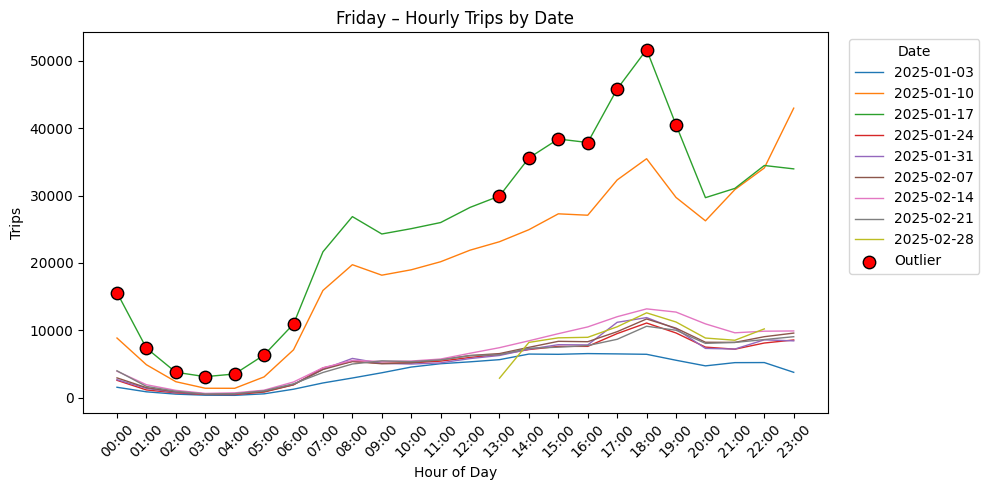

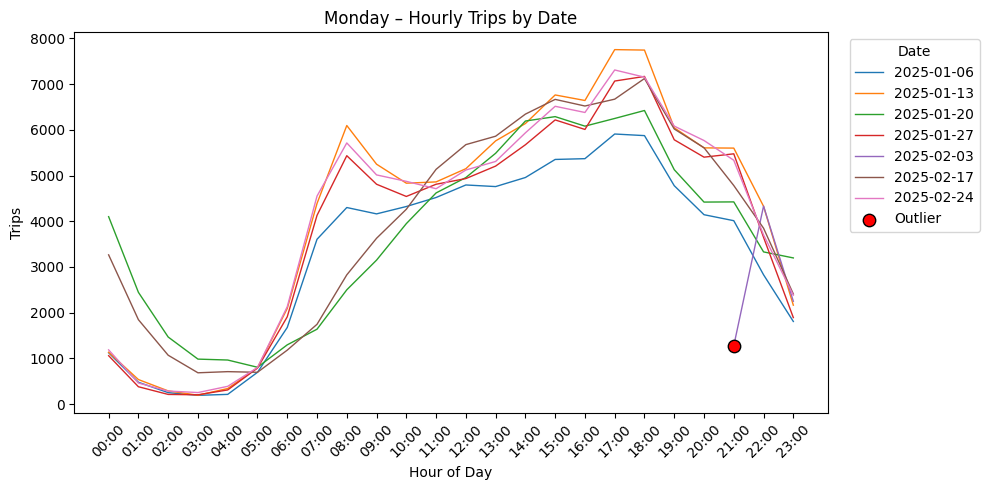

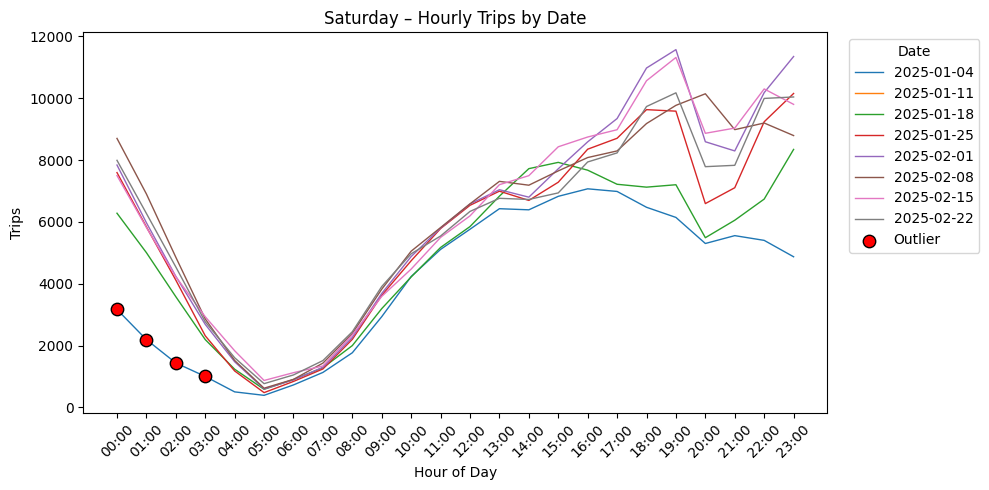

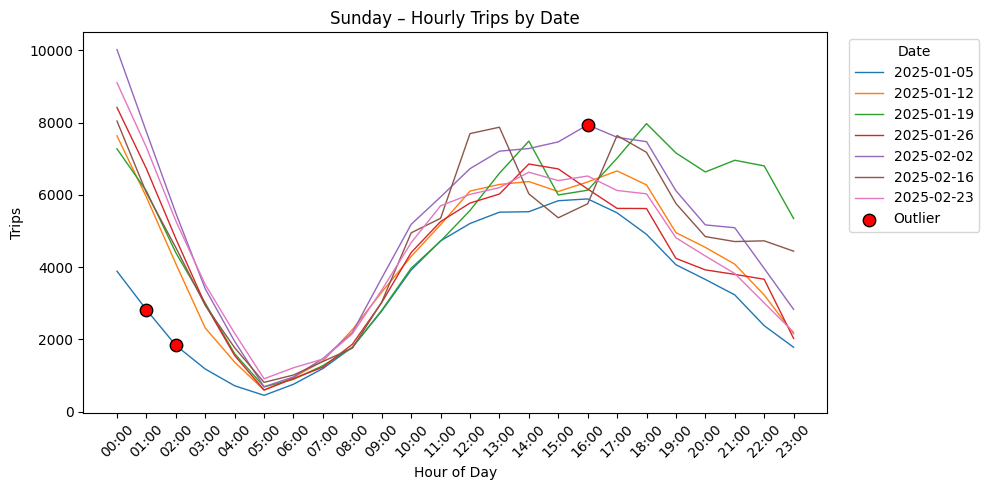

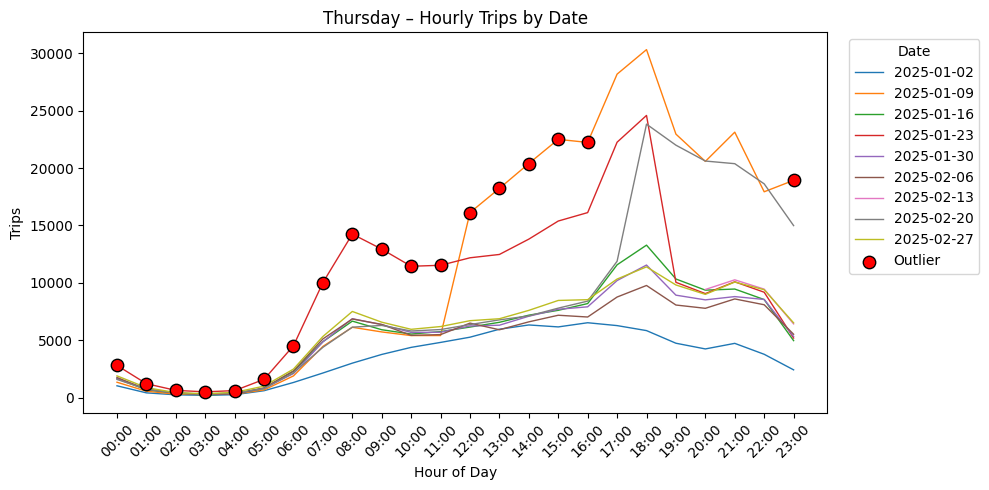

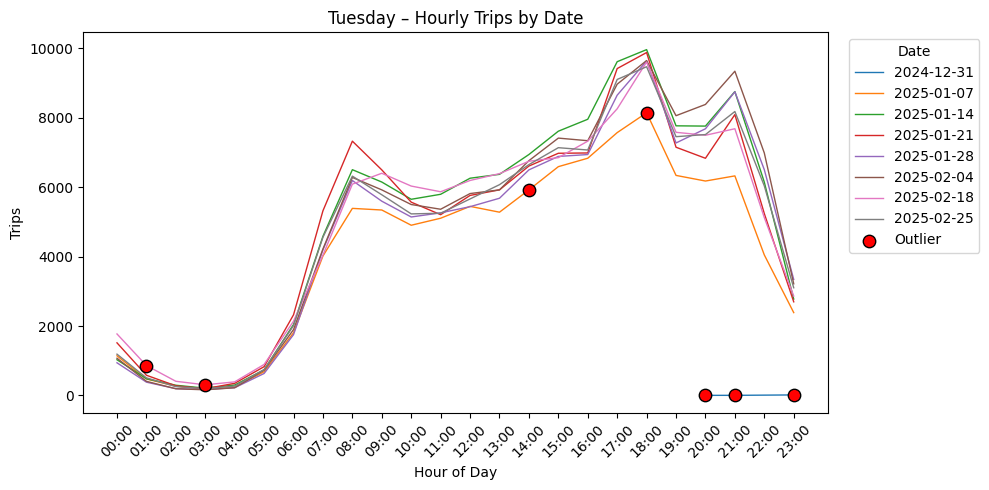

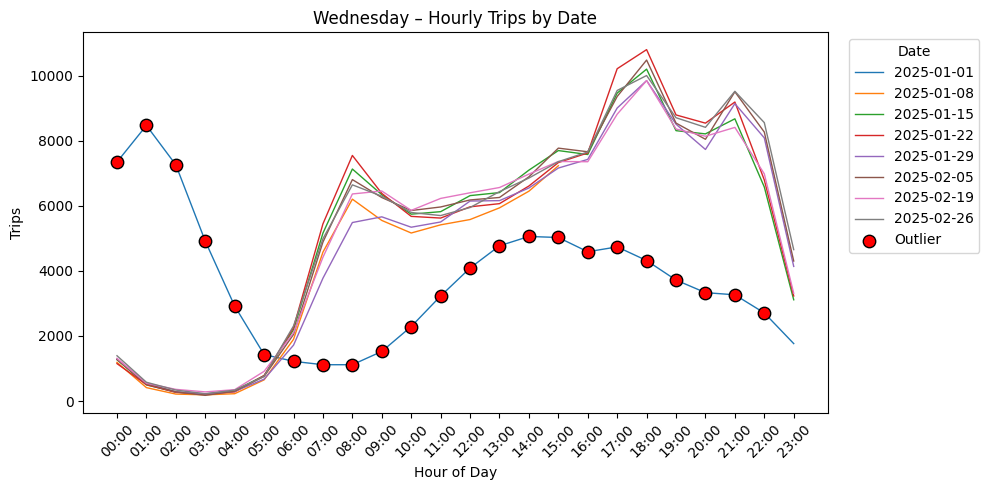

In [15]:
results = {}

for fname in sorted(os.listdir("outputs")):
    day = os.path.splitext(fname)[0]
    df = pd.read_csv(f"outputs/{fname}")

    df["hour_start_full"] = pd.to_datetime(df["hour_start_full"])
    df["date_only"] = df["hour_start_full"].dt.date
    df["hour"] = df["hour_start_full"].dt.hour

    hourly = (df
        .groupby(["date_only", "hour"], as_index=False)
        .agg(hourly_trips=("num_trips", "sum")))

    stats = (hourly
        .groupby("hour")["hourly_trips"]
        .agg(mu="mean", sigma="std")
        .reset_index())

    merged = hourly.merge(stats, on="hour")
    merged["is_outlier"] = (
        (merged.hourly_trips > merged.mu + 2 * merged.sigma) |
        (merged.hourly_trips < merged.mu - 2 * merged.sigma)
    )

    results[day] = merged

for day, df in results.items():
    plt.figure(figsize=(10, 5))
    plt.title(f"{day.capitalize()} – Hourly Trips by Date")

    for date, group in df.groupby("date_only"):
        hours = group["hour"]
        trips = group["hourly_trips"]
        plt.plot(
            hours,
            trips,
            label=str(date),
            linewidth=1
        )

    out = df[df["is_outlier"]]
    plt.scatter(
        out["hour"],
        out["hourly_trips"],
        color="red",
        edgecolor="black",
        s=80,
        zorder=5,
        label="Outlier" if not out.empty else None
    )

    plt.xticks(
        ticks=range(0, 24),
        labels=[f"{h:02d}:00" for h in range(24)],
        rotation=45
    )
    plt.xlabel("Hour of Day")
    plt.ylabel("Trips")
    plt.legend(title="Date", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [34]:
# Outlier detection for Jan 9, 17, 23, 2025 against all same‐weekday history
import pandas as pd
import os
from glob import glob

target_info = {
    "2025-01-09": range(12, 21),   # Fri 9 Jan, 12:00–20:00
    "2025-01-17": range(14, 20),   # Fri 17 Jan, 14:00–19:00
    "2025-01-23": range(7, 11),    # Thu 23 Jan, 07:00–10:00
}

all_rows = []
for path in glob("outputs/*.csv"):
    weekday = os.path.splitext(os.path.basename(path))[0]
    df = pd.read_csv(path)
    df["hour_start_full"] = pd.to_datetime(df["hour_start_full"])
    df["date_only"]        = df["hour_start_full"].dt.date.astype(str)
    df["hour"]             = df["hour_start_full"].dt.hour
    df["weekday"]          = weekday
    all_rows.append(df[["date_only","weekday","hour","pickup_zone","dropoff_zone","num_trips"]])
all = pd.concat(all_rows, ignore_index=True)

for date, hours in target_info.items():
    weekday = pd.to_datetime(date).strftime("%A").lower()

    mask = (all["weekday"] == weekday) & (all["hour"].isin(hours))
    baseline_df = all[mask & (all["date_only"] != date)]

    today_df    = all[mask & (all["date_only"] == date)]

    baseline_stats = (
        baseline_df
        .groupby(["hour","pickup_zone","dropoff_zone"])["num_trips"]
        .agg(mu="mean", sigma="std")
        .reset_index()
        .fillna(0)
    )

    today_agg = (
        today_df
        .groupby(["hour","pickup_zone","dropoff_zone"], as_index=False)
        .agg(trips=("num_trips","sum"))
    )

    merged = today_agg.merge(baseline_stats, on=["hour","pickup_zone","dropoff_zone"], how="left")
    merged["is_outlier"] = merged["trips"] > (merged["mu"] + 2*merged["sigma"])

    outliers = merged[merged["is_outlier"]].sort_values("trips", ascending=False)
    outliers["hour_str"] = outliers["hour"].apply(lambda h: f"{h:02d}:00")

    print(f"\n=== Outlier zone‑pairs on {date} ({weekday.title()}, hours {min(hours)}–{max(hours)}) ===")
    display(outliers[["hour_str","pickup_zone","dropoff_zone","trips","mu","sigma"]].reset_index(drop=True))



=== Outlier zone‑pairs on 2025-01-09 (Thursday, hours 12–20) ===


,hour_str,pickup_zone,dropoff_zone,trips,mu,sigma
0,15:00,237,236,324,90.285714,40.807329
1,14:00,237,236,300,97.285714,38.247938
2,15:00,236,237,297,96.285714,61.791893
3,17:00,236,237,273,104.714286,83.707256
4,16:00,237,236,270,89.571429,47.877821
...,...,...,...,...,...,...
10738,12:00,239,42,2,1.000000,0.000000
10739,12:00,249,48,2,1.000000,0.000000
10740,12:00,264,48,2,1.000000,0.000000
10741,12:00,13,141,2,1.000000,0.000000



=== Outlier zone‑pairs on 2025-01-17 (Friday, hours 14–19) ===


,hour_str,pickup_zone,dropoff_zone,trips,mu,sigma
0,15:00,237,236,395,109.000000,85.538630
1,14:00,236,236,375,75.375000,52.546408
2,17:00,237,236,370,91.500000,58.561323
3,14:00,237,236,365,118.000000,94.003039
4,15:00,236,236,360,94.125000,75.765498
...,...,...,...,...,...,...
10367,19:00,263,125,5,1.500000,0.577350
10368,19:00,263,113,5,1.833333,1.329160
10369,14:00,17,37,5,1.333333,0.577350
10370,14:00,13,100,5,2.200000,1.303840



=== Outlier zone‑pairs on 2025-01-23 (Thursday, hours 7–10) ===


,hour_str,pickup_zone,dropoff_zone,trips,mu,sigma
0,09:00,236,237,158,63.714286,13.536547
1,10:00,236,237,142,67.571429,12.394315
2,08:00,236,161,132,51.428571,14.443651
3,07:00,237,236,118,34.571429,11.457998
4,08:00,237,161,112,38.571429,10.517559
...,...,...,...,...,...,...
4102,07:00,132,157,2,1.000000,0.000000
4103,07:00,4,142,2,1.000000,0.000000
4104,10:00,262,164,2,1.000000,0.000000
4105,10:00,262,158,2,1.000000,0.000000


Our time‑series analysis revealed that certain dates—such as December 30 and January 1—exhibit clearly exceptional traffic patterns compared to the rest of the dataset. In addition, January 9, 17, and 23 stood out as unusually high‑volume days. I therefore conducted a detailed zone‑pair analysis for those three dates. On January 9, I confirmed that the Ice Theatre of New York’s performance at Wollman Rink in Central Park—serving taxi zones 236 and 237—coincided with the spike in yellow‑taxi trips during the specified hours.